# Demos of Traditoional Collocation Method Using Chebychev Polynomials and the Alternative PINN Method Applied to the Poisson Equation
- [Collocation for a PDE](#collocation-for-a-pde)
- [PINN for a PDE](#pinn-approach-for-a-pde)

# Collocation for a PDE

Consider a linear PDE expressed as:

$$ L(u) = f $$

where $ L $ is the differential operator, $ u $ the solution function, and $ f $ a source function. For the Poisson PDE, this is $ L(u) = u'' = f $. Boundary conditions within the domain $ x \in [0, 1] $ are specified by:

$$ u(0) = a $$
$$ \frac{\partial u}{\partial x}(1) = b $$

# Defining the Solution Function

We propose an approximate solution $ u^h $ to the PDE:

$$ u^h(x) = \sum_{n=0}^{N} c_n \phi_n(x) $$

The coefficients $ c_n $ and basis functions $ \phi_n(x) $ are selected, such as [Legendre](https://en.wikipedia.org/wiki/Legendre_polynomials), [Laguerre](https://en.wikipedia.org/wiki/Laguerre_polynomials), [Chebyshev polynomials](https://en.wikipedia.org/wiki/Chebyshev_polynomials), or the [Fourier series](https://en.wikipedia.org/wiki/Fourier_series).

The PDE and boundary conditions for $ u = u^h $ are:

$$ L(u

^h) = f $$
$$ u^h(0) = a $$
$$ \frac{\partial u^h}{\partial x}(1) = b $$

# Defining the Constraints 
The number of degrees of freedom (DOFs), $(N+1)$, must match the total number of constraints. Boundary conditions count as constraints $m_b$, and collocation points are denoted as $m_c$. Hence, we have $m_b + m_c$ constraints in total.

# Determining the Collocation Points 
Collocation points are crucial for enforcing the PDE at specific locations within the domain. We assume these points, $\{ \xi_i \}_{i=1}^{m_c}$, are evenly distributed across $[0, 1]$.

# Creating the System of Equations 

The system of equations is constructed by applying constraints to $u^h$:

$$ u^h(0) = a \quad \Rightarrow \quad \sum_{n=0}^{N} c_n\phi_n(0) = a $$
$$ \frac{\partial u^h}{\partial x}(1) = b \quad \Rightarrow \quad \sum_{n=0}^{N} c_n\phi'_n(1) = b $$

At each collocation point $\xi_i$, we have:

$$ L(u^h(\xi_i)) = f(\xi_i) \quad \text{for } i = 1, \ldots, m_c $$

# Matrix Form when $L$ is Linear

With a linear $L$, the PDE can be represented as:

$$ L\left( \sum_{n=0}^{N} c_n \phi_n(x) \right) = \sum_{n=0}^{N} c_n L(\phi_n(x)) $$

The coefficients $c_n$ form the vector $\mathbf{c}$ in the following system:

$$
\begin{bmatrix}
\phi_0(0) & \phi_1(0) & \cdots & \phi_N(0) \\
\phi'_0(1) & \phi'_1(1) & \cdots & \phi'_N(1) \\
L(\phi_0(\xi_1

)) & L(\phi_1(\xi_1)) & \cdots & L(\phi_N(\xi_1)) \\
\vdots & \vdots & \ddots & \vdots \\
L(\phi_0(\xi_{m_c})) & L(\phi_1(\xi_{m_c})) & \cdots & L(\phi_N(\xi_{m_c}))
\end{bmatrix}
\begin{bmatrix}
c_0 \\
c_1 \\
c_2 \\
\vdots \\
c_N
\end{bmatrix}
=
\begin{bmatrix}
a \\
b \\
f(\xi_1) \\
\vdots \\
f(\xi_{m_c})
\end{bmatrix}
$$

This matrix system, which must be of size $(m_b + m_c) \times (N+1)$, will yield the coefficients when solved. 

# Example PDE: Poisson

Apply the method to the 1-D Poisson equation over the domain $ x \in [0, 1] $:

$$ \frac{\partial^2 u}{\partial x^2} = \sin(x), \quad x \in [0, 1] $$
$$ u(0) = 1 $$
$$ \frac{\partial u}{\partial x}(1) = 2 $$

The boundary conditions are thus:

$$ u(0) = 1 $$
$$ \frac{\partial u}{\partial x}(1) = 2 $$

## Defining the Solution Function

The approximate solution $ u^h $ takes the form:

$$ u^h(x) = \sum_{n=0}^{N} c_n \phi_n(x) $$

This yields the approximated PDE and boundary conditions:

$$ \frac{\partial^2 u^h}{\partial x^2} = \sin(x), \quad x \in [0, 1] $$
$$ u^h(0) = 1 $$
$$ \frac{\partial u^h}{\partial x}(1) = 2 $$

## Creating the System of Equations

The boundary conditions are expressed as:

$$ u^h(0) = 1 \quad \Rightarrow \quad c_0\phi_0(0) + c_1\phi_1(0) + \cdots + c_N\phi_N(0) = 1 $$
$$ \frac{\partial u^h}{\partial x}(1) = 2 \quad \Rightarrow \quad c_0\phi'_0(1) + c_1\phi'_1(1) + \cdots + c_N\phi'_N(1) = 2 $$

At the collocation points, we have:

$$ \frac{\partial^2 u^h}{\partial x^2}(\xi_i) = \sin(\xi_i), \quad i = 1, \ldots, m_c $$

## Matrix Form for a Linear Operator

For the linear Poisson operator, the system is represented as:

$$
\begin{bmatrix}
\phi_0(0) & \phi_1(0) & \cdots & \phi_N(0) \\
\phi'_0(1) & \phi'_1(1) & \cdots & \phi'_N(1) \\
\phi''_0(\xi_1) & \phi''_1(\xi_1) & \cdots & \phi''_N(\xi_1) \\
\vdots & \vdots & \ddots & \vdots \\
\phi''_0(\xi_{m_c}) & \phi''_1(\xi_{m_c}) & \cdots & \phi''_N(\xi_{m_c})
\end{bmatrix}
\begin{bmatrix}
c_0 \\
c_1 \\
c_2 \\
\vdots \\
c_N
\end{bmatrix}
=
\begin{bmatrix}
1 \\
2 \\
\sin(\xi_1) \\
\vdots \\
\sin(\xi_{m_c})
\end{bmatrix}
$$

Solving this matrix equation provides the DOFs $ c_n $, which in turn reconstructs $ u^h $, our approximate solution.


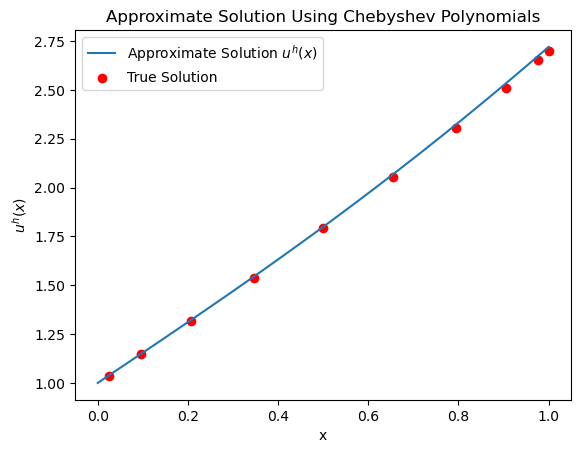

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from numpy.polynomial.chebyshev import chebval, chebder

# Set the degree of the polynomial and the number of collocation points.
N = 10  # Degree of the Chebyshev polynomial.
m_c = N - 2  # Number of collocation points, adjusting for boundary conditions.

def cheb_poly(N, x):
    """
    Compute Chebyshev polynomials up to degree N and their first and second derivatives at points x.
    
    Parameters:
    - N: The highest degree of the Chebyshev polynomial.
    - x: Points at which to evaluate the polynomials and their derivatives.
    
    Returns:
    - T: Chebyshev polynomials evaluated at x.
    - T_prime: First derivatives of the Chebyshev polynomials at x.
    - T_double_prime: Second derivatives of the Chebyshev polynomials at x.
    """
    # Initialize arrays for polynomials and their first and second derivatives.
    T = np.array([np.ones_like(x), x])
    T_prime = np.array([np.zeros_like(x), np.ones_like(x)])
    T_double_prime = np.array([np.zeros_like(x), np.zeros_like(x)])
    
    # Recursively calculate higher-degree polynomials and derivatives.
    for n in range(2, N+1):
        Tn = 2 * x * T[n-1] - T[n-2]
        Tn_prime = 2 * T[n-1] + 2 * x * T_prime[n-1] - T_prime[n-2]
        Tn_double_prime = 4 * T_prime[n-1] + 2 * x * T_prime[n-1] - T_double_prime[n-2]
        T = np.append(T, [Tn], axis=0)
        T_prime = np.append(T_prime, [Tn_prime], axis=0)
        T_double_prime = np.append(T_double_prime, [Tn_double_prime], axis=0)
    
    return T, T_prime, T_double_prime

# Calculate the collocation points using Chebyshev nodes to minimize numerical error.
xi = 0.5 * (1 + np.cos(np.pi * np.linspace(0, N-1, N) / N))

# Initialize matrices for the system of equations and the right-hand side (RHS).
A = np.zeros((N+1, N+1))
b = np.zeros(N+1)

# Compute the Chebyshev polynomials and their derivatives at the collocation points.
T, T_prime, T_double_prime = cheb_poly(N, xi)

# Apply boundary conditions directly into the system matrix and RHS vector.
A[0, :] = cheb_poly(N, np.array([0]))[0][:, 0]  # u(0) = 1
b[0] = 1
A[1, :] = cheb_poly(N, np.array([1]))[1][:, 0]  # du/dx(1) = 2
b[1] = 2

# Fill the system matrix with second derivatives for the interior collocation points.
for i in range(2, N+1):
    A[i, :] = T_double_prime[:, i-2]
    b[i] = np.sin(xi[i-2])

# Solve the linear system to find the coefficients of the Chebyshev polynomial expansion.
c = solve(A, b)

# Construct the approximate solution u^h(x) using the obtained coefficients.
x_plot = np.linspace(0, 1, 500)
T_plot, _, _ = cheb_poly(N, x_plot)
u_h_plot = T_plot.T @ c

# Plot the approximate solution alongside the true solution for comparison.
plt.plot(x_plot, u_h_plot, label='Approximate Solution $u^h(x)$')
plt.scatter(xi, -np.sin(xi) + (2 + np.cos(1)) * xi + 1, color='red', label='True Solution')
plt.xlabel('x')
plt.ylabel('$u^h(x)$')
plt.legend()
plt.title('Approximate Solution Using Chebyshev Polynomials')
plt.show()


# PINN Approach for a PDE
To apply a Physics-Informed Neural Network (PINN) to solve the given 1-D Poisson equation over the domain $x \in [0, 1]$ with specified boundary conditions, we can follow these steps:

### 1. **Neural Network Architecture**

First, define a neural network $u_{\theta}(x)$, where $\theta$ represents the network's parameters. This network will approximate the solution to the differential equation. A typical architecture might consist of several fully connected layers with a nonlinear activation function, such as $\text{Tanh}$, between layers.

```python
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 20),  # Input layer
            nn.Tanh(),         # Activation function
            nn.Linear(20, 20), # Hidden layer
            nn.Tanh(),         # Activation function
            nn.Linear(20, 1)   # Output layer
        )
    
    def forward(self, x):
        return self.net(x)
```

### 2. **PDE Residual**

The residual of the PDE, given by $\frac{\partial^2 u}{\partial x^2} - \sin(x)$, measures how well the neural network's output fits the differential equation. The second derivative of the network output $u_{\theta}(x)$ with respect to $x$ can be computed using automatic differentiation.

### 3. **Loss Function**

The loss function comprises two parts: the PDE residual and the boundary conditions. It is formulated as:

$$ \text{Loss}(\theta) = \text{MSE}_{\text{PDE}} + \text{MSE}_{\text{BC}} $$

- $\text{MSE}_{\text{PDE}}$ is the mean squared error of the PDE residual over the domain.
- $\text{MSE}_{\text{BC}}$ includes the errors from the boundary conditions, specifically:
    - $u_{\theta}(0) = 1$
    - $\frac{\partial u_{\theta}}{\partial x}(1) = 2$

### 4. **Optimization**

Use an optimization algorithm, such as Adam, to minimize the loss function with respect to the neural network parameters $\theta$. This step adjusts $\theta$ to reduce both the PDE residual and the boundary condition errors.

```python
optimizer = optim.Adam(model.parameters(), lr=0.001)
```

### 5. **Training Loop**

During training, repeatedly evaluate the loss function on a set of points $x \in [0, 1]$, compute gradients with respect to $\theta$, and update $\theta$ using the optimizer.

```python
for epoch in range(epochs):
    optimizer.zero_grad()
    loss = loss_function(np.linspace(0, 1, 100))
    loss.backward()
    optimizer.step()
```

### 6. **Evaluation**

After training, use the trained neural network to predict the solution $u_{\theta}(x)$ across the domain and compare it with the true solution or analytical benchmarks.

```python
x_plot = np.linspace(0, 1, 100).reshape(-1, 1)
with torch.no_grad():
    u_pred = model(torch.tensor(x_plot, dtype=torch.float32)).numpy()
```

### 7. **Visualization**

Plot the predicted solution $u_{\theta}(x)$ against the domain $x \in [0, 1]$ to visualize the performance of the PINN model and how closely it approximates the true solution to the Poisson equation given the boundary conditions.

Epoch 0, Loss: 5.385618209838867
Epoch 500, Loss: 0.0019882754422724247
Epoch 1000, Loss: 0.00039269434637390077
Epoch 1500, Loss: 9.115094144362956e-05
Epoch 2000, Loss: 5.323885125108063e-05
Epoch 2500, Loss: 3.638194903032854e-05
Epoch 3000, Loss: 2.3970253096194938e-05
Epoch 3500, Loss: 1.5372146663139574e-05
Epoch 4000, Loss: 9.888866770779714e-06
Epoch 4500, Loss: 6.732334441039711e-06


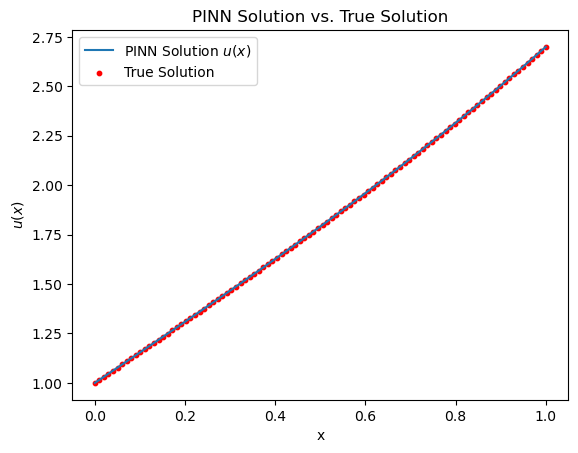

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the neural network architecture
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 20),  # Input layer with 1 input neuron (x)
            nn.Tanh(),
            nn.Linear(20, 20),  # Hidden layer with 20 neurons
            nn.Tanh(),
            nn.Linear(20, 1)    # Output layer with 1 output neuron (u(x))
        )
    
    def forward(self, x):
        return self.net(x)

# Instantiate the model
model = PINN().to(device)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the loss function
def loss_function(x):
    # Convert numpy arrays to torch tensors
    x_tensor = torch.tensor(x, requires_grad=True).float().to(device)
    x_tensor = x_tensor.view(-1, 1)  # Reshape for the network
    
    # Forward pass to get u(x)
    u = model(x_tensor)
    
    # Compute derivatives
    u_x = torch.autograd.grad(u.sum(), x_tensor, create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x.sum(), x_tensor, create_graph=True)[0]
    
    # PDE residual
    pde_residual = u_xx - torch.sin(x_tensor)
    
    # Boundary conditions
    bc1_loss = (model(torch.tensor([[0.0]], device=device)) - 1)**2  # u(0) = 1
    bc2_loss = (u_x[-1] - 2)**2  # u'(1) = 2
    
    # Total loss
    return torch.mean(pde_residual**2) + bc1_loss + bc2_loss

# Training loop
epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    loss = loss_function(np.linspace(0, 1, 100))  # Training points in the domain
    loss.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Plot the solution
x_plot = np.linspace(0, 1, 100).reshape(-1, 1)
x_tensor = torch.tensor(x_plot, dtype=torch.float32).to(device)
with torch.no_grad():
    u_pred = model(x_tensor).cpu().numpy()

plt.plot(x_plot, u_pred, label='PINN Solution $u(x)$')
plt.scatter(x_plot, -np.sin(x_plot)+(2+np.cos(1))*x_plot + 1, color='red', label='True Solution', s=10)
plt.xlabel('x')
plt.ylabel('$u(x)$')
plt.legend()
plt.title('PINN Solution vs. True Solution')
plt.show()
